# Python Visualizations

In [1]:
# import numpy
import numpy as np

# import pandas
import pandas as pd

# import pyplot
import matplotlib.pyplot as plt

# run matplotlib inline for displaying using Jupyter notebook
%matplotlib inline

## matplotlib
#### Display a Plot
- Display plots inline in Jupyter Notebook    
    - `%matplotlib inline` 
- Display a figure
    - `plt.show()`
- Save a figure as an image
    - `plt.savefig('filename.png')`

#### Assigning Data
- `plt.plot(x-var, y-var[, options])`
    - Options
        - `color=''`
- Can assign more than one plot to the same graph, just specify the same `x-var` in multiple `plt.plot` commands
    - specify a different color for each plot

#### Labels and Axis Control
- Labels and Graph Items
    - `plt.xlabel(string)`
    - `plt.ylabel(string)`
    - `plt.title(string)`
- Axis Ranges (use either tuples or lists to supply)
    - `plt.axis([xmin, xmax, ymin, ymax])`
        - sets all at once
    - `plt.xlim([xmin, xmax])` sets only the x axis 
        - will use default vertical scale that fits all the data
    - `plt.ylim([ymin, ymax])` sets only the y axis
        - will use default horizontal scale that fits all the data
    - other `axis` options
        - `'off'` hides the axis lines/labels
        - `'equal'` sets the scale equal for x, y
            - equal axis doesn't mean square plot, especially evident with multiple plots
        - `'square'` forces a square plot
        - `'tight'` sets xlim(), ylim() to show all data
- Rotate x axis labels
    - `plt.gcf().autofmt_xdate()`

#### Default Style Sheets
- Provides defaults for lines, points, backgrounds, etc.
- `plt.style.availabe`
    - provides a list of styles available to use
- `plt.style.use('style')` to set the style to use
    - `'ggplot'`
    - `'fivethirtyeight'`

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0

  state/region   ages  year  population
0           SC  total  1990   3501155.0
1           SC  total  1991   3570404.0
2           SC  total  1992   3620464.0
3           SC  total  1993   3663314.0
4           SC  total  1994   3705397.0



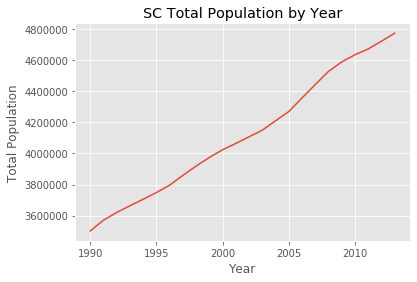

In [2]:
# import state population data
df = pd.read_csv('DSHB_Data\state-population.csv')

print(df.head())
print()

# filter data to SC total population
sc_filter = np.logical_and(df['state/region'] == 'SC', df['ages'] == 'total')

# subset the data to SC total population and reset index
sc_pop_data = df[sc_filter]
sc_sorted_pop_data = sc_pop_data.sort_values('year')
sc_sorted_pop_data.reset_index(inplace=True)
del sc_sorted_pop_data['index']

print(sc_sorted_pop_data.head())
print()

# get the years
years = list(sc_sorted_pop_data.loc[:, 'year'])

# get the total population
tot_pop = list(sc_sorted_pop_data.loc[:, 'population'])

# create the plot

# set plot style to 'ggplot'
plt.style.use('ggplot')

plt.plot(years, tot_pop)

# configure the plot labels
plt.title('SC Total Population by Year')
plt.xlabel('Year')
plt.ylabel('Total Population')

plt.show()

#### Multiple Plots Using 'Axes'
- Assigning axes values
    - Useful for control over axes
    - Useful when showing multiple sets on one plot that have different value ranges
        - can produce two plots side by side if you specify these numbers correctly
            - could also overlay
            - depends on where your bottom left corner is, and the width you set
        - can produce two plots on top of each other
            - adjust your bottom left corner and the height you set
    - `plt.axes([x_lo, y_lo, width, height])`
        - list args all expressed in 'figure units'(numbers 0-1 scaled to the dimensions of the figure)
            - `x_lo` 
            - `y_lo`
                - these two values set the lower left corner locations of the plot
            - `width`
            - `height`
                - these two values set the size of the plot
        - every `plt.` command that follows will use the specified `axes` until it is changed
        - the first `axes` command will appear on the left of the plot, the second on the right

#### Multiple Plots Using 'Subplot' (better than axes)
- Use to display multiple plots
    - the 'rows' and 'cols' below are how the different plots are arranged
    - 'rows' and 'cols' numbers are 1-indexed starting at the top left corner
- `plt.subplot(nrows, ncols, nsubplot)`
    - `nrows` = number of rows
    - `ncols` = number of columns
    - `nsubplot` = the number of the subplot to activate for subsequent commands
        - numbering is left to right, then down a row, left to right like numbering words on a page
        - each command that follows applies to the active subplot, until another subplot is activated
    - `plt.subplot(1, 2, x)` is side by side
    - `plt.subplot(2, 1, x)` is top and bottom
- `plt.tight_layout()`
    - Makes sure that axis labels/titles don't overlap

  state/region   ages  year  population
0           SC  total  1990   3501155.0
1           SC  total  1991   3570404.0
2           SC  total  1992   3620464.0
3           SC  total  1993   3663314.0
4           SC  total  1994   3705397.0

  state/region   ages  year  population
0           FL  total  1990  13033307.0
1           FL  total  1991  13369798.0
2           FL  total  1992  13650553.0
3           FL  total  1993  13927185.0
4           FL  total  1994  14239444.0



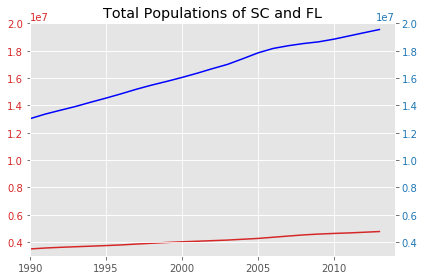

In [3]:
# use the state population dataframe from before

# compare SC data to FL data
# filter data to FL total population
fl_filter = np.logical_and(df['state/region'] == 'FL', df['ages'] == 'total')

# subset the data to SC total population and reset index
fl_pop_data = df[fl_filter]
fl_sorted_pop_data = fl_pop_data.sort_values('year')
fl_sorted_pop_data.reset_index(inplace=True)
del fl_sorted_pop_data['index']

print(sc_sorted_pop_data.head())
print()

print(fl_sorted_pop_data.head())
print()

# years and tot_pop still populated for SC

# get the years for FL
fl_years = list(fl_sorted_pop_data.loc[:, 'year'])

# get the total population for FL
fl_tot_pop = list(fl_sorted_pop_data.loc[:, 'population'])

# set the plot style
plt.style.use('ggplot')

# parse the subplot to first configure sc plot
fig, sc_ax = plt.subplots()

# configure the SC plot
color = 'tab:red'
sc_ax.set_xlabel = ('Years')
sc_ax.set_ylabel = ('SC Total Population')
sc_ax.plot(years, tot_pop, color=color)
sc_ax.tick_params(axis='y', labelcolor=color)
sc_ax.set(xlim=(1990, 2014))
sc_ax.set(ylim=(3000000, 20000000))
sc_ax.axis('on')

# configure the FL plot
fl_ax = sc_ax.twinx() # create a second axis that shares the same x-axis

color = 'tab:blue'
fl_ax.set_ylabel = ('FL Total Population')
fl_ax.plot(years, fl_tot_pop, color='blue')
fl_ax.tick_params(axis='y', labelcolor=color)
fl_ax.set(xlim=(1990, 2014))
fl_ax.set(ylim=(3000000, 20000000))

plt.title('Total Populations of SC and FL')

fig.tight_layout()

plt.show()

#### Scatter Plots
- `plt.scatter(x_data, y_data, marker='', color='', label='')`
    - `marker` is used to set the shape of the marker
    - `color` is pretty obvious
    - `label` is important if creating a legend

#### Legend and Annotate for Labeling Plots
- `plt.legend(loc='')`
    - must supply a `label` for each plot (see scatter example above)
    - supply a `loc` description as a string listed below or its integer counterpart
        - 'upper left' = 2
        - 'center left' = 6
        - 'best' = 0
        - 'upper center' = 9
        - 'center' = 10
        - 'lower center' = 8
        - 'upper right' = 1
        - 'center right' = 7
        - 'lower right' = 4
        - 'right' = 5
- `plt.annotate('label', xy=(xcoord, ycoord)[, xytext(xcoord, ycoord), arrowprops])`
    - will place your supplied 'label' at the xy coordinates specified by your supplied tuple
    - can draw an arrow if you supply `xytext` and `arrowprops`
        - `arrowprops` is a dictionary with the arrow's properties
            - `{'color':''}` at mininum to draw the arrow
            - `xy` will be where the arrow points
            - `xytext` is where the text is and where the arrow comes from

## 2D Arrays/Figures with Meshgrid
#### Numpy's Meshgrid
- Creating a quick meshgrid
    - `Y, X = np.meshgrid(range(10), range(20)`
        - will create two arrays of shape (20, 10) with steps of 1
- Creating a custom meshgrid
    - `u = np.linspace(start, stop, num)`
        - `stop` is included unless `endpoint=False`
    - `v = np.linspace(start, stop, num)`
    - `X, Y = meshgrid(u, v)`
        - creates your custom arrays of shape 'step' from u, 'step' from v
        - values are 'num' from u, and 'num' from v

#### plt.pcolor
- Creates a plot with colors used to represent different values
    - creates a pixelated plot, with pixels of different colors
    - good for storing/plotting images
    - the number of pixels is determined by your meshgrid
- `plt.pcolor([X, Y,] Z [cmap=''])`
    - Z is the data to plot
    - X and Y can specify axis values
        - default is the size of the mesh grid
    - `cmap` defines the color scheme

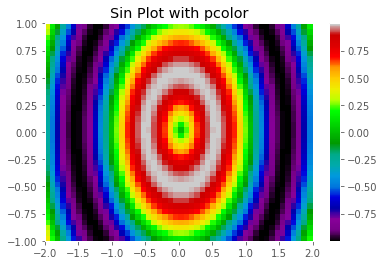

In [4]:
# create a sin plot using meshgrid and pcolor

# create two 1-d arrays
# increasing the number of points changes the resolution of the plot
u = np.linspace(-2, 2, 51)
v = np.linspace(-1, 1, 41)

# create a meshgrid based on the 1-d arrays
X, Y = np.meshgrid(u, v)

# compute Z based on X and Y
Z = np.sin(3*np.sqrt(X**2 + Y**2))

# create the color plot using pcolor
plt.pcolor(X, Y, Z, cmap='nipy_spectral')  # set the cmap='' to change the color scheme
    # just doing plt.pcolor(Z) will use the dimensions of the mesh (51, 41) as the axis scales
    # occurs when omitting X, Y from the plt.pcolor() call above
plt.colorbar()  # displays a color bar as a key for the values of each pixel
plt.axis('tight') # fixes issues with whitespace around figures
plt.title('Sin Plot with pcolor')
plt.show()

#### plt.contour
- Similar to pcolor, but will show contour lines for constant values
    - good for maps or other continuous data types
- `plt.contour([X, Y,] Z[, num])`
    - where `Z` is the equation based on a meshgrid
    - X and Y are optional to provide your data range vs. size of the meshgrid
    - `num` is the number of contour lines to draw
- `plt.contourf()`
    - 'filled' contour plot, transitions are not continuous
        - increase the `num` of lines to makes transitions appear continuous
        - decrease the `num` of lines to show stark jumps
    - accepts the same args as plt.contour

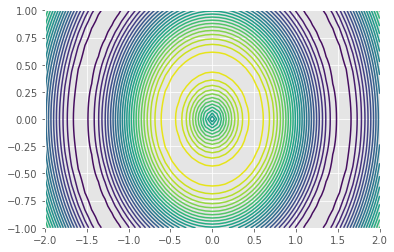

In [5]:
# same data as before, this time calling plt.contour

plt.contour(X, Y, Z, 30)
plt.show()

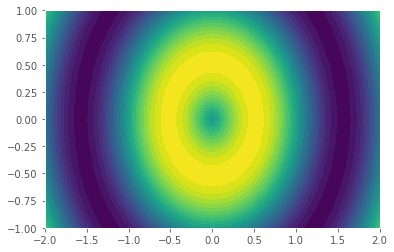

In [6]:
# same data as before, this time calling plt.contourf

plt.contourf(X, Y, Z, 30)
plt.show()

## Histograms
#### 1-D Histograms
- `plt.hist(data, bins=num[, range=()])`
    - can specify the number of bins to use
    - optional `range=()` arg accepts a nest of tuples to set x and y axis ranges
        - `range=((xmin, xmax), (ymin, ymax))`
        
- Adding other options
    - `counts, bins, patches = plt.hist(data, bins=)`
    - on datacamp, need to check this out more

#### 2-D Histograms
- `plt.hist2d(x, y, bins(xnum,ynum))`
    - 'x' and 'y' are 1-d arrays of the same length
    - bins are specified as a tuple of integers 
        - 'xnum' and 'ynum' specify the axes
    - the bins are rectangular in shape
- `plt.hexbin(x, y, gridsize=(xnum,ynum)[, extent=()])`
    - works similarly to hist2d, but uses hexagonal bins
    - `gridsize` is the number of hexagonal bins to draw in the x, y directions
    - `extent=()` works like `range` above, but only supply 1 tuple
        - `extent=(xmin, xmax, ymin, ymax)`

## Color Images
- Usually 3 2d arrays
    - 1 2d array (or channel) for each color in RGB
    - channel values are 0-1 as floats or 0-255 as ints
- Loading images
    - `img = plt.imread('filename.png')`
- Showing images
    - `plt.imshow(img_var[, extent=()])`
        - optional `extent=(xmin, xmax, ymin, ymax)` is useful when resampling if image shape is distorted
            - can use the original image shape as the maxes, with 0 as the mins, fixing aspect ratio
        - `plt.axis('off')` # turn axis and labels off
    - `plt.show()`
- Converting to grayscale method 1
    - collapse the RGB channels by averaging along axis 2
        - `collapsed = img.mean(axis=2)`
        - now a 2d array
    - explicityly set the cmap to gray
        - `plt.set_cmap('gray')`
    - `plt.imshow(collapsed, cmap='gray')`
    - `plt.axis('off')`
    - `plt.show()`
- Converting to grayscale method 2
    - get the sum of the intensities, then plot
        - `intensity = img.sum(axis=2)`
    - `plt.imshow(intensity, cmap='gray)`
    - `plt.axis('off')`
    - `plt.show()`